In [41]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [42]:
#read the train set file
data = pd.read_csv("riceClassification.csv")


In [43]:
# Print information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


Text(0.5, 1.0, 'Correlation')

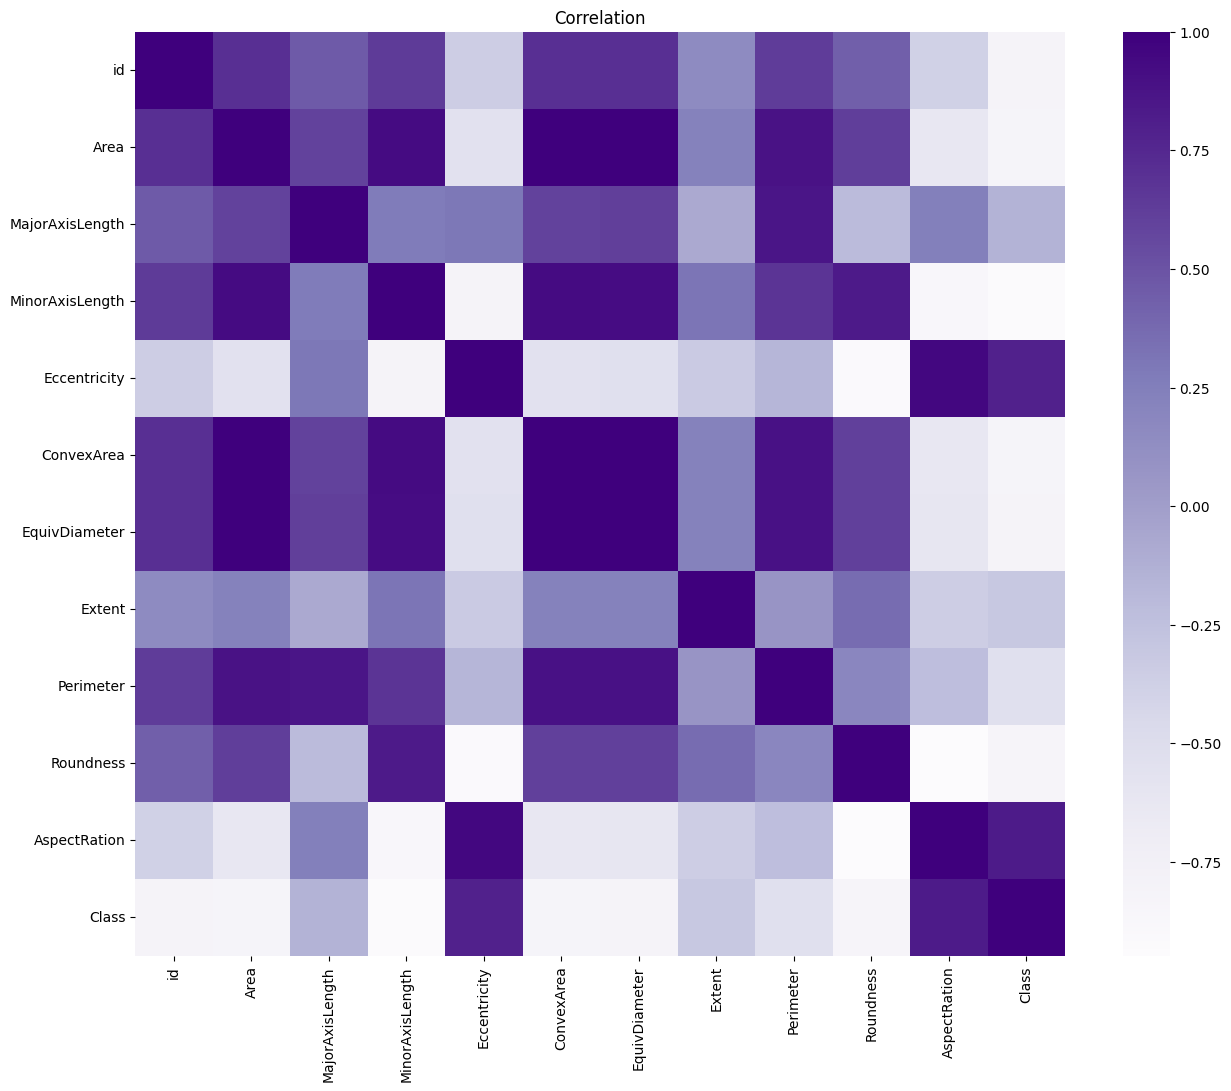

In [44]:
 # Import seaborn library for advanced data visualization
import seaborn as sns
# Calculate correlation matrix
corr=data.corr()
# Create a new figure
fig=plt.figure(figsize=(15,12))
r=sns.heatmap(corr,cmap='Purples')
r.set_title("Correlation")


In [45]:
# y=data["Class"]
# X_data=data.drop(['Class'],axis='columns')
# Separate features (X_data) and target variable (y)
X_data = data.iloc[:, 1:-1]
y= data.iloc[:, -1]
x=(X_data-np.min(X_data))/(np.max(X_data)-np.min(X_data))
from sklearn.model_selection import train_test_split
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [46]:
X_data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000


In [47]:
x.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,0.412145,0.008363,0.005799,0.000050,0.424864,0.006889,0.000044,0.024792,0.000054,0.000115
1,0.260889,0.006769,0.004654,0.000050,0.273880,0.005478,0.000049,0.018909,0.000060,0.000116
2,0.276878,0.006915,0.004712,0.000051,0.284509,0.005643,0.000053,0.019063,0.000063,0.000117
3,0.279149,0.006982,0.004702,0.000051,0.286780,0.005667,0.000055,0.019121,0.000063,0.000119
4,0.335473,0.007717,0.005105,0.000052,0.345375,0.006213,0.000054,0.020909,0.000064,0.000121


In [48]:
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=1)


In [49]:
# Print length of training set
len(X_train)

14548

In [50]:
# Print length of test set
len(X_test)

3637

In [51]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Define ANN model
model = keras.Sequential()
model.add(keras.layers.Dense(16, input_shape=(10,), activation='sigmoid'))
model.add(keras.layers.Dense(12, activation='sigmoid'))
model.add(keras.layers.Dense(4, activation='softmax'))


In [53]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [54]:
# Train the model
model.fit(X_train, y_train, epochs=5)


Epoch 1/5
455/455 [==============================] - 1s 2ms/step - loss: 0.4952 - accuracy: 0.9190
Epoch 2/5
455/455 [==============================] - 1s 2ms/step - loss: 0.0835 - accuracy: 0.9859
Epoch 3/5
455/455 [==============================] - 1s 2ms/step - loss: 0.0545 - accuracy: 0.9867
Epoch 4/5
455/455 [==============================] - 1s 2ms/step - loss: 0.0466 - accuracy: 0.9875
Epoch 5/5
455/455 [==============================] - 1s 2ms/step - loss: 0.0431 - accuracy: 0.9876


In [55]:
model.evaluate(X_test, y_test)

114/114 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.9876


[0.03924908861517906, 0.9876271486282349]

In [56]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=5)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [57]:
print("Train accuracy:",RF_model.score(X_train,y_train))
print("Test accuracy:",RF_model.score(X_test,y_test))

Train accuracy: 0.9984190266703327
Test accuracy: 0.9887269727797635


In [58]:
y_predicted = RF_model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1614,   25],
       [  16, 1982]])

Text(50.722222222222214, 0.5, 'Truth')

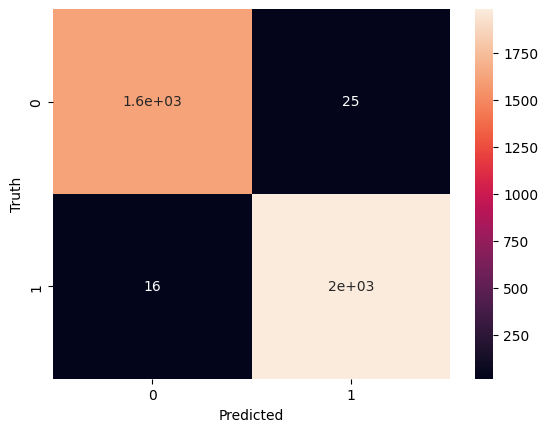

In [59]:
import seaborn as sn
plt.figure()
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
from sklearn.svm import SVC
svm=SVC(random_state=1)


In [61]:
svm.fit(X_train, y_train)

SVC(random_state=1)

In [62]:
print("Train accuracy:",svm.score(X_train,y_train))
print("Test accuracy:",svm.score(X_test,y_test))


Train accuracy: 0.9903766840802859
Test accuracy: 0.9909265878471267


In [66]:
from sklearn.linear_model import LogisticRegression
lgrgmodel =LogisticRegression()

In [67]:
lgrgmodel.fit(X_train, y_train)

LogisticRegression()

In [68]:
lgrg_pred =lgrgmodel.predict(X_test)

In [69]:
lgrg_pred

array([0, 0, 1, ..., 0, 1, 1])

In [70]:
lgrgmodel.score(X_test,y_test)

0.9898267803134452

In [71]:
print("Train accuracy:",lgrgmodel.score(X_train,y_train))
print("Test accuracy:",lgrgmodel.score(X_test,y_test))

Train accuracy: 0.9890019246631839
Test accuracy: 0.9898267803134452


In [72]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [73]:
nb.fit(X_train, y_train)

GaussianNB()

In [74]:
nb.score(X_test,y_test)

0.9829529832279351

In [75]:
print("Train accuracy:",nb.score(X_train,y_train))
print("Test accuracy:",nb.score(X_test,y_test))

Train accuracy: 0.9837091009073412
Test accuracy: 0.9829529832279351


In [76]:
# Perform cross-validation using Logistic Regression
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), X_train, y_train, cv=5)

array([0.98762887, 0.99072165, 0.98831615, 0.98934342, 0.98831213])